# Project Definition

## Project Overview

I my capstone project I am building a maschine learning model to predict stock prices.
I am using the stock trading data from yahoo finance. 
As input I take daily trading data: opening price (Open), highest price the stock traded at (High), how many stocks were traded (Volume) and closing price adjusted for stock splits and dividends (Adjusted Close).
My model predicts the Adjusted Close price for chosen companies for given query dates.


A training interface accepts a data range (start_date, end_date) and a list of ticker symbols (e.g. GOOG, AAPL), and builds a model of stock behavior. Code reads the desired historical prices from the data source.

A query interface accepts a list of dates and a list of ticker symbols, and outputs the predicted stock prices for each of those stocks on the given dates.
Note that the query dates passed in must be after the training date range, and ticker symbols must be a subset of the ones trained on.

A basic run of the core system would involve one call to the training interface, and one or more calls to the query interface. Implement a train-test cycle to measure the performance of your model. Use it to test prediction accuracy for query dates at different intervals after the training end date, e.g. the day immediately after training end date, 7 days later, 14 days, 28 days, etc.
(Note: Pick the training period accordingly so that you have ground truth data for that many days in the future.)

## Problem Statement

The problem I would like to solve here it to built a model that predicts stock prices. To do that I would like to explore some maschine learning technics including time series (ARIMA) and regression models (Random Forest Regressor). I will use history dataset from yahoo finance. Older data to train the models and newer data to test them. I am going to use newer data for testing so that future doesnt influence the past.

#A strategy for solving the problem, including discussion of the expected solution, has been made

## Metrics

To measure the performance of my models I will use the method of least squares to look how far are my predictions from the actual values.

#Metrics used to measure performance of a modelor result are clearly defined. Metrics are justified based on the characteristics of the problem.

# Analysis

## Data Exploration

Features and calculated statistics relevant to the problem have been reported and discussed related to the dataset, and a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.

## Data Visualization

Build data visualizations to further convey the information associated with your data exploration journey. Ensure that visualizations are appropriate for the data values you are plotting.

# Methodology

## Data Preprocessing

All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.

## Implementation

The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.

## Refinement

The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.

# Results

## Model Evaluation and Validation

If a model is used, the following should hold: The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.

Alternatively a student may choose to answer questions with data visualizations or other means that don't involve machine learning if a different approach best helps them address their question(s) of interest.

## Justification

The final results are discussed in detail.
Exploration as to why some techniques worked better than others, or how improvements were made are documented.

# Conclusion

## Reflection

Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.

## Improvement

Discussion is made as to how at least one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.

In [125]:
# import necessary libraries

import yfinance as yf
from get_all_tickers import get_tickers as gt

import time
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [292]:
# getting a list of symbols for companies 
list_of_tickers = sorted(gt.get_tickers())
list_of_tickers[:10]


['A', 'AA', 'AACG', 'AACQ', 'AACQU', 'AACQW', 'AAL', 'AAMC', 'AAME', 'AAN']

In [293]:
def how_long(func, *args):
    t1 = time.time()
    result = func(*args)
    t2=time.time()
    return result, print('Time: ', t1-t2, ' seconds')

**Download chosen stocks from yahoo finance**

In [366]:
# symbols are chosen stocks, I want to download

symbols = sorted(['AAN', 'SPY', 'AAPL', 'AAL', 'TSLA', 'F', 'MSFT', 'GOOG'])
start_date = '2010-01-01'
end_date = '2020-01-31'
df = yf.download(symbols, start_date, end_date)

[*********************100%***********************]  8 of 8 completed


**Look at descriptive statistics of the chosen stocks**

In [343]:
df[['Adj Close']].describe()

Adj Close                                                      \
               AAL          AAN         AAPL            F         MSFT   
count  2537.000000  2537.000000  2537.000000  2537.000000  2537.000000   
mean     27.710345    32.177967    26.236552     9.623939    52.928603   
std      15.234226    12.153537    14.966973     1.513178    36.129366   
min       3.770966    12.618592     5.927071     6.096806    18.133703   
25%      10.690690    24.869150    14.233548     8.563780    24.250099   
50%      31.704927    28.039423    22.941702     9.656665    39.968819   
75%      40.405098    38.172928    36.742161    10.773566    68.990829   
max      56.988728    77.796219    80.529434    12.790388   171.416428   

                                 
               SPY         TSLA  
count  2537.000000  2414.000000  
mean    179.337129    37.193094  
std      64.018621    23.638656  
min      83.225769     3.160000  
25%     117.646317     6.880000  
50%     177.494995    42.590000  
75%     229.886871    53.320999  
max     327.253632   128.162003

**Define function to plot stock prices**

In [412]:
def plot_data(df, symbols, title='Stock prices', ylabel='Price', y=0 , step=100, ax=None):
    '''Plot stock prices
    INPUT:
    df - Dataframe
    title - title
    y - horizontal line, integer
    step - xticks step, integer
    OUTPUT: plot'''
    
    ax = df.plot(title=title, figsize=(16,8), ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.axhline(y=y, color='black')
    ax.legend(symbols, loc='upper left')
    try:
        plt.yticks(np.arange(0, df.max().max()+step, step=step))
    except:
        pass
    plt.show()


**Plot stock prices**

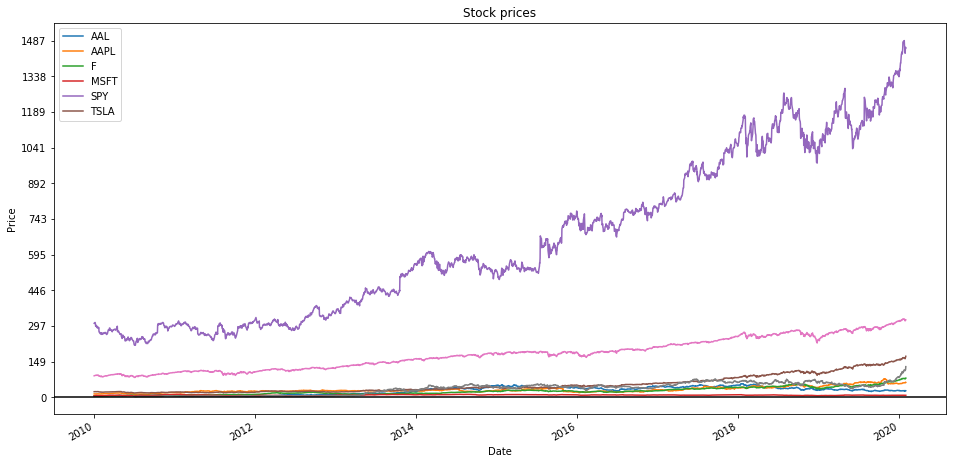

In [408]:
# Plot development of stock prices

plot_data(df['Adj Close'], symbols, title='Stock prices', ylabel='Price', y=0 , step=df['Adj Close'].max().max()/10)

**Normalize data / Calculate cumulative return of the chosen stocks**

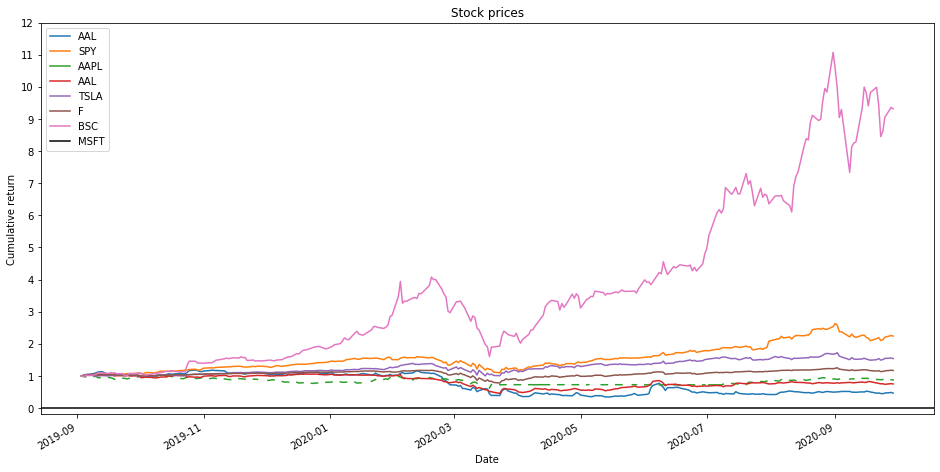

In [283]:
def normalize_data(df):
    return df/df.iloc[0,:]

plot_data(normalize_data(df['Adj Close']), symbols, ylabel='Cumulative return',  step=1)
plt.show()

**Looking at rolling mean/std and upper/lower bounds**

In [159]:
# Add Rolling mean 20 for Adj Close
df[pd.MultiIndex.from_product([['Rolling mean Adj Close 20'], set(symbols)])] = df['Adj Close'].rolling(window=20).mean()

In [284]:
# Plot rolling statistics for a chosen stock

symbol='SPY'
price_type = 'Adj Close'

def rolling_params(symbol, price_type, window=20):
    '''Create rolling mean, rolling standard deviation, upper_band and lower_band of 2 std
    INPUT:
    symbol - stock
    window - how many days - the number of observations used for calculating the statistic
    price_type - type of price for which create rolling parameters
    OUTPUT: rolling mean, rolling standard deviation, upper_band and lower_band of 2 std'''
    
    values = df[(price_type, symbol)]
    rolling_mean = df[(price_type, symbol)].rolling(window=window).mean()
    rolling_std = df[(price_type, symbol)].rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2
    return values, rolling_mean, rolling_std, upper_band, lower_band

values, rolling_mean, rolling_std, upper_band, lower_band = rolling_params(symbol, price_type)

         
def plot_rolling(symbol, values, rolling_mean, upper_band, lower_band, title='Rolling mean Adj Close 20 {}'.format(symbol)):
    '''Plot rolling mean and upper/lower bands of a stock
    INPUT:
    symbol - stock
    rolling_mean - rolling 20 days mean of the stock
    upper_band - upper band of the stock
    lower_band
    title - title
    OUTPUT: plot'''
    
    ax = rolling_mean.plot(title=title, figsize=(16,8), label='Rolling mean')
    plt.plot(upper_band, label='Upper band')
    plt.plot(lower_band, label='Lower band')
    plt.plot(values, label='Stock Values')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()
    return ax


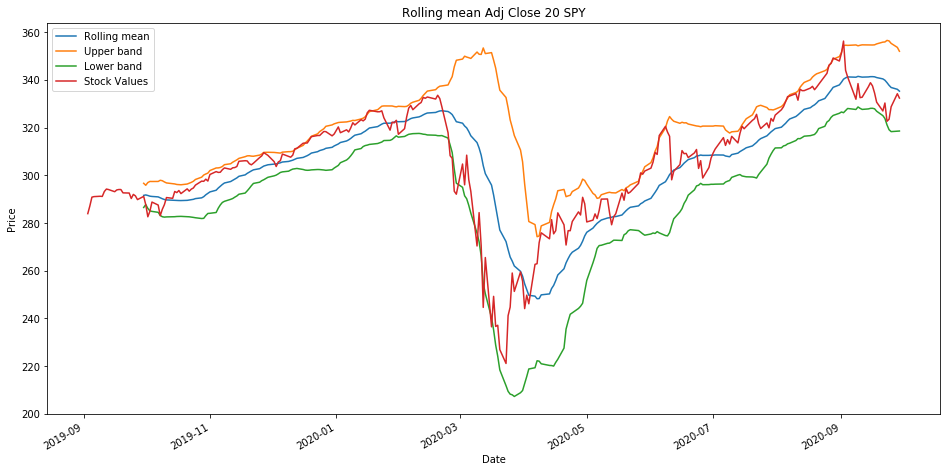

In [285]:
plot_rolling(symbol, values, rolling_mean, upper_band, lower_band)
plt.show()

**Look at Daily returns**

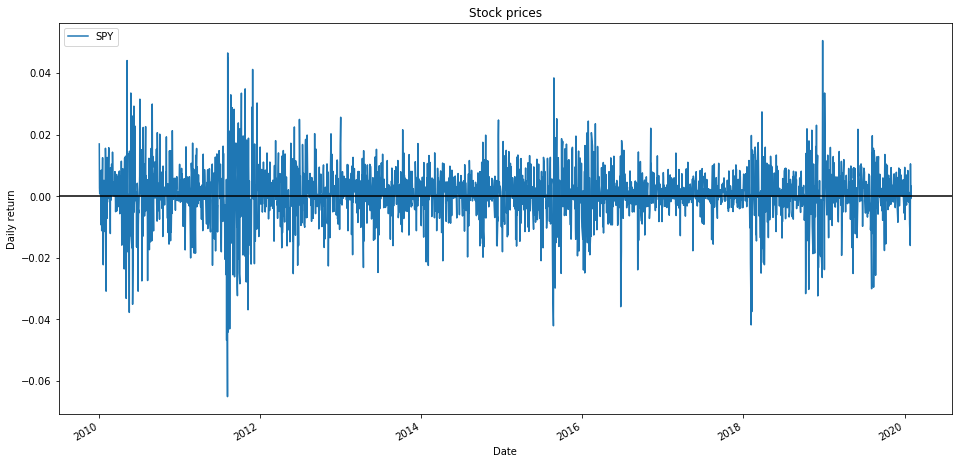

In [393]:
#Daily returns

def daily_returns(symbol):
    daily_returns = (df[('Adj Close', symbol)][1:]/df[('Adj Close', symbol)][:-1].values)-1
    return daily_returns

plot_data(daily_returns('SPY'), symbols=['SPY'], ylabel='Daily return', y=0)
plt.show()

**Scatterplot of Daily returns of two stocks**

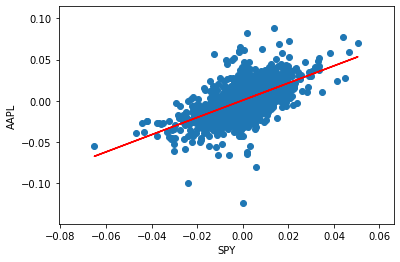

Beta:  1.0443502443946666 Alpha:  0.0005523567587817396 Correlation:  0.5953940975214456


In [365]:
x_stock = daily_returns('SPY')
y_stock = daily_returns('AAPL')
beta, alpha = np.polyfit(x_stock, y_stock, 1)

plt.scatter(x_stock, y_stock)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(x_stock, beta*x_stock + alpha, color='r')
plt.show()
print('Beta: ', beta, 'Alpha: ', alpha, 'Correlation: ', x_stock.corr(y_stock, method='pearson'))




**Clean Data**

In [375]:
# fill NaN values

data = df.copy()
data = data.dropna(how='all', axis=1)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

Adj Close                                               \
                  AAL        AAN       AAPL         F         GOOG   
Date                                                                 
2009-12-31   4.562870  14.526752   6.503574  6.748657   308.832428   
2010-01-04   4.496876  14.249126   6.604801  6.937616   312.204773   
2010-01-05   5.005957  14.378253   6.616219  7.396526   310.829926   
2010-01-06   4.798555  14.378253   6.510980  7.673220   302.994293   
2010-01-07   4.939965  14.494466   6.498945  7.868933   295.940735   
...               ...        ...        ...       ...          ...   
2020-01-24  27.538231  61.250271  79.032265  8.849499  1466.709961   
2020-01-27  26.013866  61.210419  76.708298  8.741339  1433.900024   
2020-01-28  26.800957  62.535450  78.878326  8.820001  1452.560059   
2020-01-29  26.701324  63.481903  80.529434  8.860000  1458.630005   
2020-01-30  27.617937  62.565338  80.412743  8.840000  1455.839966   

                                                    Close             ...  \
                  MSFT         SPY        TSLA        AAL        AAN  ...   
Date                                                                  ...   
2009-12-31   23.801456   89.950172    4.778000   4.840000  15.000000  ...   
2010-01-04   24.168472   91.475693    4.778000   4.770000  14.713333  ...   
2010-01-05   24.176279   91.717857    4.778000   5.310000  14.846666  ...   
2010-01-06   24.027906   91.782425    4.778000   5.090000  14.846666  ...   
2010-01-07   23.778025   92.169884    4.778000   5.240000  14.966666  ...   
...                ...         ...         ...        ...        ...  ...   
2020-01-24  163.737518  324.118561  112.963997  27.639999  61.480000  ...   
2020-01-27  160.999283  318.923157  111.603996  26.110001  61.439999  ...   
2020-01-28  164.154221  322.265198  113.379997  26.900000  62.770000  ...   
2020-01-29  166.713821  321.998993  116.197998  26.799999  63.720001  ...   
2020-01-30  171.416428  323.044006  128.162003  27.719999  62.799999  ...   

                  Open                Volume                                \
                   SPY        TSLA       AAL     AAN       AAPL          F   
Date                                                                         
2009-12-31  112.769997    3.800000   5268600     700  352410800   31253700   
2010-01-04  112.370003    3.800000   9837300     900  493729600   60855800   
2010-01-05  113.260002    3.800000  25212000    2800  601904800  215620200   
2010-01-06  113.519997    3.800000  16597900     300  552160000  200070600   
2010-01-07  113.500000    3.800000  14033400     400  477131200  130201700   
...                ...         ...       ...     ...        ...        ...   
2020-01-24  332.440002  114.125999  18067800  588500  146537600   68100900   
2020-01-27  323.029999  108.398003  21573800  668200  161940000   60769300   
2020-01-28  325.059998  113.697998  11939200  382200  162234000   85163400   
2020-01-29  328.380005  115.138000   9088700  586800  216229200   59057400   
2020-01-30  324.359985  126.484001  10685500  496600  126743200   42827800   

                                                        
                GOOG      MSFT        SPY         TSLA  
Date                                                    
2009-12-31   2448700  31929700   90637900   93831500.0  
2010-01-04   3927000  38409100  118944600   93831500.0  
2010-01-05   6031900  49749600  111579900   93831500.0  
2010-01-06   7987100  58182400  116074400   93831500.0  
2010-01-07  12876600  50559700  131091100   93831500.0  
...              ...       ...        ...          ...  
2020-01-24   1784600  24918100   87578400   71768000.0  
2020-01-27   1755200  32078100   84062500   68040500.0  
2020-01-28   1577400  24899900   63834000   58942500.0  
2020-01-29   1077700  34754500   53888900   89007500.0  
2020-01-30   1339400  51597500   75491800  145028500.0  

[2537 rows x 48 columns]

**Portfolio Allocation**

In [404]:
#Calculate portfolio value
start_value = 1000000
symbols = sorted(['SPY', 'AAPL', 'AAL', 'TSLA', 'F', 'MSFT'])
start_date = '2016-01-01'
end_date = '2020-01-31'
allocs = [0.2, 0.3, 0.25, 0.15,  0.05, 0.05]

def portfolio_value(symbols, start_value, allocs, start_date, end_date):
    allocated = normalize_data(data['Adj Close'][symbols][start_date:end_date]) * allocs
    position_values = allocated*data['Adj Close'][symbols][start_date:end_date] * start_value
    portfolio_value = position_values.sum(axis=1)
    return portfolio_value


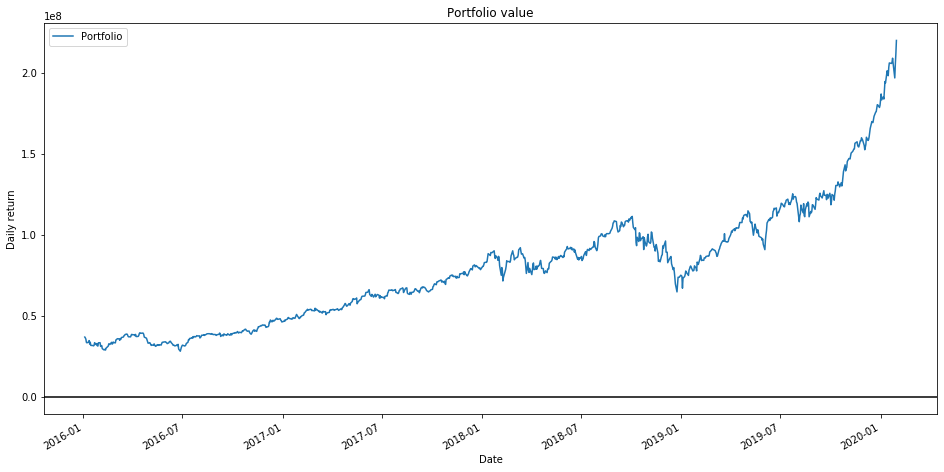

In [411]:
# Plot portfolio return

portfol_val = portfolio_value(symbols, start_value, allocs, start_date, end_date)

plot_data(portfol_val, title='Portfolio value', symbols=['Portfolio'],  ylabel='Daily return', y=0)

In [416]:
# Calculate portfolio statistics

cum_ret = (portfol_val[-1]/portfol_val[0]) - 1
avg_daily_ret = portfol_val.mean()
std_daily_ret =portfol_val.std() #volatility


sharpe_ratio = sqrt(252)*avg_daily_ret/std_daily_ret

In [417]:
sharpe_ratio

33.999545624930434

In [35]:
SPY = yf.download('SPY', start="2000-01-01", end="2020-09-20")
AAPL = yf.download('AAPL', start="2000-01-01", end="2020-09-20")
AAL = yf.download('AAL', start="2000-01-01", end="2020-09-20")
TSLA = yf.download('TSLA', start="2000-01-01", end="2020-09-20")
F = yf.download('F', start="2000-01-01", end="2020-09-20")
BAC = yf.download('BAC', start="2000-01-01", end="2020-09-20")
MSFT = yf.download('MSFT', start="2000-01-01", end="2020-09-20")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


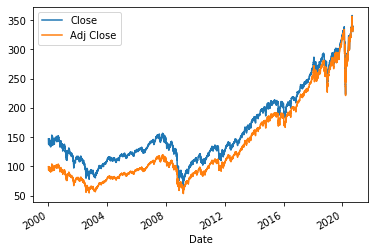

In [144]:
SPY[['Close','Adj Close']].plot()
plt.show()

In [45]:
symbols = data.xs('Adj Close', axis=1).columns

In [290]:
maket_cap={}
sector={}
forwardPE={}
for symbol in symbols:
    try:
        forwardPE[symbol] = yf.Ticker(symbol).info['forwardPE']
        maket_cap[symbol]= yf.Ticker(symbol).info['marketCap']
        sector[symbol]= yf.Ticker(symbol).info['sector']
    except:
        continue

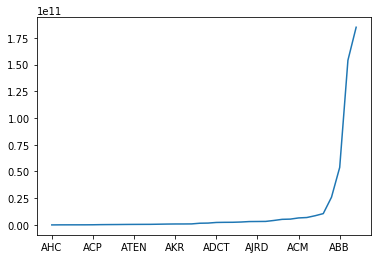

In [101]:
aa = pd.Series(maket_cap)
aa.describe().astype('int64')
a_plot=aa.sort_values().plot()

In [102]:
aa['ACP']

170137296

In [ ]:
start_date=input('Please fill out start_date')
end_date=input('Please fill out end_date')
tickers=input('Please fill out the SYMBOLS as a list:')

In [15]:
#data.to_csv("Historical_data_2000_to_2020.csv")
#data_2010_to_2020 = yf.download(list_of_tickers, start="2010-01-01", end="2020-09-20", )
#data.iloc[:, data.columns.get_level_values(0)=='Adj Close']


In [6]:
import requests

#url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-trending-tickers"
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"
#url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-watchlist-performance"

#querystring = {"region":"US"}
querystring = {"frequency":"1d","filter":"history","period1":"1420017402","period2":"1600331819","symbol":"AAPL, MSFT" }
#querystring = {"region":"US","symbols":"%5EGSPC","pfId":"the_berkshire_hathaway_portfolio","userId":"X3NJ2A7VDSABUI4URBWME2PZNM"}

headers = {
'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
'x-rapidapi-key': "6431c8b565mshc98e4aa4eb645bbp19c3cajsn30d8484b8f92"
}


response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)


{"prices":[{"date":1600263000,"open":115.2300033569336,"high":116,"low":112.04000091552734,"close":112.12999725341797,"volume":154679000,"adjclose":112.12999725341797},{"date":1600176600,"open":118.33000183105469,"high":118.83000183105469,"low":113.61000061035156,"close":115.54000091552734,"volume":184642000,"adjclose":115.54000091552734},{"date":1600090200,"open":114.72000122070312,"high":115.93000030517578,"low":112.80000305175781,"close":115.36000061035156,"volume":140150100,"adjclose":115.36000061035156},{"date":1599831000,"open":114.56999969482422,"high":115.2300033569336,"low":110,"close":112,"volume":180860300,"adjclose":112},{"date":1599744600,"open":120.36000061035156,"high":120.5,"low":112.5,"close":113.48999786376953,"volume":182274400,"adjclose":113.48999786376953},{"date":1599658200,"open":117.26000213623047,"high":119.13999938964844,"low":115.26000213623047,"close":117.31999969482422,"volume":176940500,"adjclose":117.31999969482422},{"date":1599571800,"open":113.949996948

In [329]:
bsc = yf.Ticker("BSC")
bsc.isin

KeyError: 'regularMarketOpen'

In [ ]:
'sector': 'Technology',
'industry': 'Software—Infrastructure'
'country': 'United States'
'fullTimeEmployees': 163000,
    
'volume': 30104128,
'regularMarketVolume': 30104128,
'marketCap': 1537670774784,
    
'dividendRate': 2.24,
'currency': 'USD',
'market': 'us_market',

'exchange': 'NMS',
'shortName': 'Microsoft Corporation',
'longName': 'Microsoft Corporation',
'symbol': 'MSFT',

In [ ]:
'previousClose': 200.59,
'regularMarketOpen': 199.85,
'twoHundredDayAverage': 189.74185,
'trailingAnnualDividendYield': 0.010169999,
'payoutRatio': 0.34550000000000003,
'regularMarketDayHigh': 205.5683,
'averageDailyVolume10Day': 34087587,
'regularMarketPreviousClose': 200.59,
'fiftyDayAverage': 211.67857,
'trailingAnnualDividendRate': 2.04,
'open': 199.85,
'averageVolume10days': 34087587,
'exDividendDate': 1605657600,
'beta': 0.8935339999999999,
'circulatingSupply': None,
'startDate': None,
'regularMarketDayLow': 199.2,
'currency': 'USD',

'averageVolume': 35237081,
'dayLow': 199.2,

'fiftyTwoWeekHigh': 232.86,
'fiftyTwoWeekLow': 132.52,
'fiveYearAvgDividendYield': 1.83,
'dividendYield': 0.011,

'profitMargins': 0.30962,
'enterpriseToEbitda': 22.729,
'52WeekChange': 0.47527778,
'morningStarRiskRating': None,
'forwardEps': 7.35,
'sharesOutstanding': 7567649792,
'bookValue': 15.626,
'sharesShort': 36458662,
'sharesPercentSharesOut': 0.0047999998,
'netIncomeToCommon': 44280999936,
'priceToBook': 13.003327,

In [254]:
#df.columns.get_level_values(1)
#df.iloc[:, df.columns.get_level_values(1).isin(symbols)]
#df["2000-01-01": "2005-01-01"]
#SPY.loc["2000-01-01": "2005-01-01", "Close"]
#df[['Close']].values.max(), df[['Close']].values.argmax()
#plot_data(df['Adj Close'], symbols, ax=df['Rolling mean Adj Close 20'].plot(label='Rolling mean Adj Close 20'))

#start_date = '2000-01-01'
#end_date = '2020-09-30'
#dates = pd.date_range(start_date, end_date)
#df = pd.DataFrame(index=dates)
#df = df.join(SPY)
#df.dropna(inplace=True)

#from scipy import stats
#mc = list(maket_cap.values())
#stats.describe(mc)
#list(maket_cap.values())
